In [1]:
import keras

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# Load model

In [3]:
from keras.models import load_model

In [4]:
model = load_model("./models/minist_cnn.h5")

# Get some data for prediction

### Verify on test data first

In [5]:
from keras.datasets import mnist

In [6]:
batch_size = 128
num_classes = 10
epochs = 10

img_x, img_y = (28 , 28)

input_shape = (img_x, img_y , 1)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)

# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
preds = model.predict(x_test)

In [8]:
preds[0]

array([  1.15235042e-15,   1.43304041e-15,   2.52884817e-13,
         2.01078862e-10,   6.61074929e-18,   8.05289999e-16,
         6.88082044e-22,   1.00000000e+00,   3.25479391e-17,
         3.03041620e-11], dtype=float32)

# Read in an image file

In [9]:
from skimage.io import imread
from skimage.color import rgb2gray

In [10]:
def readHandDrawnImage(filePath):
    newImage = 1 - np.reshape(rgb2gray(imread(filePath)), (1,784))
    
    return newImage

newImage = readHandDrawnImage("hand_drawn_images/real_time.png")

In [11]:
def drawMnistImageBuffer(imageBuffer):
    print("\n\nNew image loaded:")
    plt.figure()
    plt.imshow(imageBuffer.reshape((28,28)), cmap=cm.Greys)

In [12]:
def getPredictions(model, imageBuffer):
    
    processedImage = imageBuffer.reshape((28,28,1))
    
    preds = model.predict(np.array([processedImage]))
    predictedClass = np.argmax(preds)
    
    return preds, predictedClass
    
    
tempPreds, tempClass = getPredictions(model, newImage)

In [13]:
tempPreds

array([[  8.99896104e-15,   1.37992312e-10,   9.99999881e-01,
          1.15822936e-15,   2.92600601e-12,   5.73859197e-14,
          1.63938950e-07,   7.20426403e-17,   3.88481565e-13,
          3.55105659e-17]], dtype=float32)



New image loaded:
Class probabilities
	0 probability = 0.00000
	1 probability = 0.00000
	2 probability = 1.00000
	3 probability = 0.00000
	4 probability = 0.00000
	5 probability = 0.00000
	6 probability = 0.00000
	7 probability = 0.00000
	8 probability = 0.00000
	9 probability = 0.00000
Predicted digit = 2


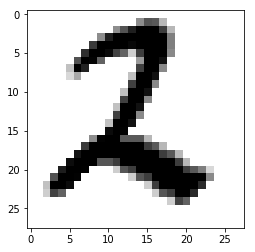

In [14]:
def predictHandDrawnImage(model, imageFilePath):
    
    rawImageBuffer = readHandDrawnImage(imageFilePath)
    
    drawMnistImageBuffer(rawImageBuffer)

    preds, predictedClass = getPredictions(model, rawImageBuffer)
    
    print("Class probabilities")
    for i, pred in enumerate(preds[0]):
        print("\t%i probability = %.5f" % (i, pred))
    print("Predicted digit = %i" % predictedClass)
    
    
predictHandDrawnImage(model, "hand_drawn_images/real_time.png")